In [1]:
# In this code example, we'll create splines in 2D and 3D using Flashlight.

%pylab inline
from pylab import *

import mpl_toolkits.mplot3d

import pathutils
pathutils.add_relative_to_current_source_file_path_to_sys_path("../../lib")

import flashlight.splineutils as splineutils

Populating the interactive namespace from numpy and matplotlib
Initializing Flashlight v0.0.1


In [2]:
# As in the previous example, we specify our spline in terms of keyframe values
# (the p values) at particular parameter values (the t values). We need to specify
# an array of t values for each dimension, because we solve for our spline
# coefficients separately for each dimension. So our T array is now a 2D array.
# Our P array is also now 2D array, where each row is a 2D point, and each column
# is a dimension. This convention seems to be most common in Python libraries
# (e.g., scikit-learn) so we adopt it throughout Flashlight. We also adopt the
# convention in Flashlight that x is the "fastest changing" coordinate, followed
# by y, followed by z. So we make y the 0th column, and x the 1st column.
T_y = matrix([0,1,2,3]).T.A
T_x = matrix([0,1,2,3]).T.A
T   = c_[T_y, T_x]
P_y = matrix([0,4,7,9]).T.A
P_x = matrix([0,9,1,4]).T.A
P   = c_[P_y, P_x]

print "T = "; print T; print; print "P = "; print P

T = 
[[0 0]
 [1 1]
 [2 2]
 [3 3]]

P = 
[[0 0]
 [4 9]
 [7 1]
 [9 4]]


In [3]:
# We compute our spline coefficients, and evalute the resulting spline, exactly
# as in the previous example.
C, T, sd = \
    splineutils.compute_minimum_variation_nonlocal_interpolating_b_spline_coefficients(
        P, T, degree=7, lamb=[0,0,0,1,0])
    
P_eval, T_eval, dT = \
    splineutils.evaluate_minimum_variation_nonlocal_interpolating_b_spline(
        C, T, sd, num_samples=100)

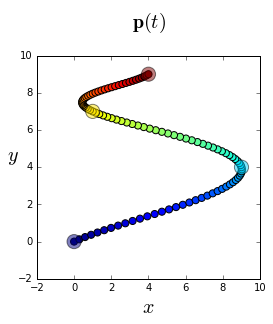

In [4]:
# We are ready to plot the spline. We use color to represent the t value of
# each point on the spline, and we plot the keyframes with larger dots.
t = T_eval[:,0]

figsize(4,4);

# For 2D plots, matplotlib adopts the convention of passing in the x
# coordinate in first, followed by the y coordinate. So we pass in
# P_eval[:,1] first because this is the x coordinate according to the
# Flashlight convention. Then we pass in P_eval[:,0] because this is
# the y coordinate according to the Flashlight convention.
scatter(P_eval[:,1], P_eval[:,0], c=t, s=50);
scatter(P[:,1], P[:,0], c=T[:,0], s=200, alpha=0.5);
title("$\mathbf{p}(t)$\n", fontsize=20);
ylabel("$y$", rotation="horizontal", fontsize=20); xlabel("$x$", fontsize=20);

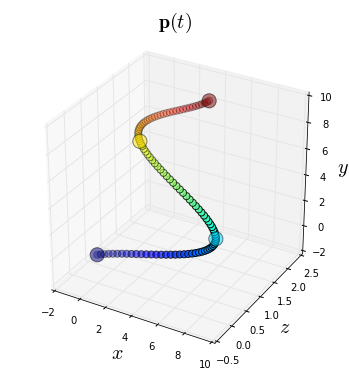

In [5]:
# Just as we did in 2D, we can compute splines in 3D.

T_z = matrix([0,1,2,3]).T.A
T_y = matrix([0,1,2,3]).T.A
T_x = matrix([0,1,2,3]).T.A
T   = c_[T_z, T_y, T_x] 
P_z = matrix([0,0,1,2]).T.A
P_y = matrix([0,4,7,9]).T.A
P_x = matrix([0,9,1,4]).T.A
P   = c_[P_z, P_y, P_x]

C, T, sd = \
    splineutils.compute_minimum_variation_nonlocal_interpolating_b_spline_coefficients(
        P, T, degree=7, lamb=[0,0,0,1,0])
    
P_eval, T_eval, dT = \
    splineutils.evaluate_minimum_variation_nonlocal_interpolating_b_spline(
        C, T, sd,num_samples=100)
    
# For 3D plots, matplotlib adopts the convention of passing in the x
# coordinate in first, followed by the y coordinate, followed by the z
# coordinate, and assumes that z is up. In Flashlight, we adopt the
# convention that y is up. The Flashlight convention has the advantage
# that 2D examples (where y is obviously up) can be more easily compared
# to 3D examples without permuting the coordinates. Because of this difference
# in conventions, we pass in P_eval[:,1] as the last spatial argument.
figsize(6,6);
fig = plt.figure(); ax = fig.add_subplot(111, projection="3d");
ax.scatter(P_eval[:,2], P_eval[:,0], P_eval[:,1], c=T_eval[:,0], s=50);
ax.scatter(P[:,2], P[:,0], P[:,1], c=T[:,0], s=200, alpha=0.5);

# Note the unpleasant permutation of axis labels because of the difference of
# conventions in matplotlib and Flashlight.
title("$\mathbf{p}(t)$\n", fontsize=20);
ax.set_zlabel("$y$", fontsize=20); xlabel("$x$", fontsize=20); ylabel("$z$", fontsize=20);